# Breast Cancer Detection Project Phase-2

!pip install -q kaggle
!pip install kaggle --upgrade
!pip install pandas
!pip install opendatasets
!pip install matplotlib

In [1]:
S#Download breakhis dataset from kaggle

import pandas as pd
import opendatasets as od
od.download('https://www.kaggle.com/datasets/ambarish/breakhis/')

NameError: name 'S' is not defined

In [3]:
#Total number of images in breakhis dataset
import os

dataset_path = '/home/aflah/Desktop/Final-Year-Project/Project-Phase-2/breakhis'
img_count=0


for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.png') or file.endswith('.jpg'): 
            img_count+=1
print("Total number of images: "+str(img_count))


Total number of images: 7909


In [4]:
#Shape of an image in breakhis dataset
import cv2
x = cv2.imread("/home/aflah/Desktop/Final-Year-Project/Project-Phase-2/breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png")
print(x.shape)


(460, 700, 3)


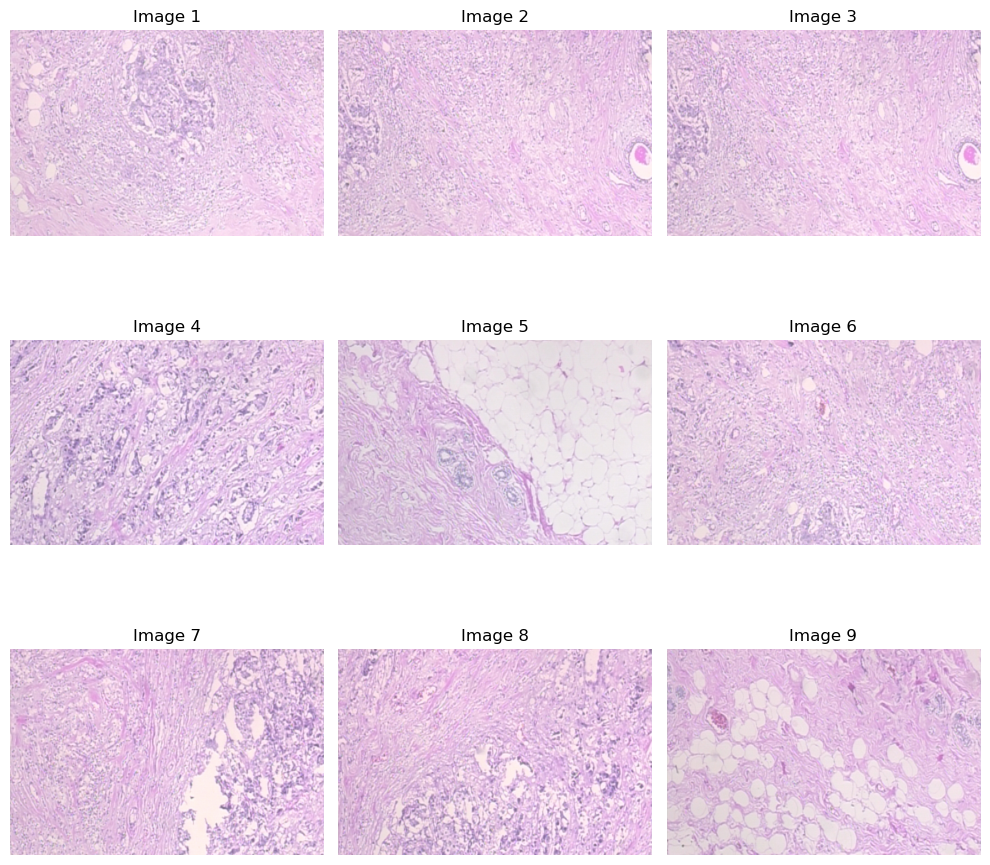

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


dataset_path = '/home/aflah/Desktop/Final-Year-Project/Project-Phase-2/breakhis'


image_paths = []


for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.png') or file.endswith('.jpg'):  
            image_path = os.path.join(root, file)
            image_paths.append(image_path)


num_images_to_display = 9

plt.figure(figsize=(10, 10))

for i in range(num_images_to_display):
    plt.subplot(3, 3, i + 1)
    img = mpimg.imread(image_paths[i])
    plt.imshow(img)
    plt.axis('off')  
    plt.title(f"Image {i+1}")

plt.tight_layout()
plt.show()


### Extracting 400X Images of Benign Category

In [5]:
import os
import shutil


benign_path = "breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB"


combined_benign_path = "combined_bengign_400X"

os.makedirs(combined_benign_path, exist_ok=True)


for sob_folder in os.listdir(benign_path):
    sob_path = os.path.join(benign_path, sob_folder)
    if os.path.isdir(sob_path):
        
        sob_output_path = os.path.join(combined_benign_path, sob_folder)
        os.makedirs(sob_output_path, exist_ok=True)
       
        for class_folder in os.listdir(sob_path):
            class_path = os.path.join(sob_path, class_folder)
            if os.path.isdir(class_path):
               
                class_name = f"{class_folder}_400x"
                class_output_path = os.path.join(sob_output_path, class_name)
                os.makedirs(class_output_path, exist_ok=True)
                
                image_path_400x = os.path.join(class_path, "400X")
                if os.path.isdir(image_path_400x):
                    # Copy images to the new folder
                    for image_file in os.listdir(image_path_400x):
                        image_src = os.path.join(image_path_400x, image_file)
                        image_dst = os.path.join(class_output_path, image_file)
                        shutil.copy(image_src, image_dst)

print("Extraction completed successfully.")


Extraction completed successfully.


### Extracting 400x Images of Malignant Category

In [6]:
import os
import shutil


benign_path = "breakhis/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB"


combined_benign_path = "combined_malignant_400X"

os.makedirs(combined_benign_path, exist_ok=True)


for sob_folder in os.listdir(benign_path):
    sob_path = os.path.join(benign_path, sob_folder)
    if os.path.isdir(sob_path):
        
        sob_output_path = os.path.join(combined_benign_path, sob_folder)
        os.makedirs(sob_output_path, exist_ok=True)
       
        for class_folder in os.listdir(sob_path):
            class_path = os.path.join(sob_path, class_folder)
            if os.path.isdir(class_path):
               
                class_name = f"{class_folder}_400x"
                class_output_path = os.path.join(sob_output_path, class_name)
                os.makedirs(class_output_path, exist_ok=True)
                
                image_path_400x = os.path.join(class_path, "400X")
                if os.path.isdir(image_path_400x):
                    # Copy images to the new folder
                    for image_file in os.listdir(image_path_400x):
                        image_src = os.path.join(image_path_400x, image_file)
                        image_dst = os.path.join(class_output_path, image_file)
                        shutil.copy(image_src, image_dst)

print("Extraction completed successfully.")


Extraction completed successfully.


### Creating Benign Images of 400X resolution

In [7]:
import os
import shutil


source_directory = "combined_bengign_400X"


destination_directory = "benign_400X_images"


os.makedirs(destination_directory, exist_ok=True)


for root, dirs, files in os.walk(source_directory):
    for file in files:
        
        file_path = os.path.join(root, file)
        
        shutil.move(file_path, destination_directory)

print("All images moved successfully.")


All images moved successfully.


### Creating Malignant Images of 400X Resolution

In [8]:
import os
import shutil


source_directory = "combined_malignant_400X"


destination_directory = "malignant_400X_images"


os.makedirs(destination_directory, exist_ok=True)


for root, dirs, files in os.walk(source_directory):
    for file in files:
        
        file_path = os.path.join(root, file)
        
        shutil.move(file_path, destination_directory)

print("All images moved successfully.")


All images moved successfully.


### Resizing benign and malignant into 3 resolutions

In [12]:
import os
import shutil

def combine_images(x_dir, y_dir, combined_dir):
    # Create the combined directory if it doesn't exist
    if not os.path.exists(combined_dir):
        os.makedirs(combined_dir)

    # Iterate over files in x directory
    for filename in os.listdir(x_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            shutil.copy(os.path.join(x_dir, filename), os.path.join(combined_dir, filename))

    # Iterate over files in y directory
    for filename in os.listdir(y_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            shutil.copy(os.path.join(y_dir, filename), os.path.join(combined_dir, filename))

# Example usage
x_directory = "benign_400X_images"
y_directory = "malignant_400X_images"
combined_directory = "combined"

combine_images(x_directory, y_directory, combined_directory)


# Building MRCAE Architecture

### Creating Convolutional Auto Encoders

In [2]:
#Importing Libraries
import numpy as np
import os
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from keras.models import save_model, load_model


2024-05-05 15:52:01.210426: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-05 15:52:01.211937: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-05 15:52:01.233922: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 15:52:01.233947: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 15:52:01.234591: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
#Preprocessing Target Images 
def load_and_preprocess_images(data_path, target_resolution):
    images = []
    for filename in os.listdir(data_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  
            image_path = os.path.join(data_path, filename)
            img = load_img(image_path, target_size=(target_resolution, target_resolution), color_mode='grayscale')
            img_array = img_to_array(img) / 255.0  # Normalize pixel values
            images.append(img_array)
    return np.array(images)

In [3]:
low_res_data_path = "Resized/resized/100"
mid_res_data_path = "Resized/resized/224"
high_res_data_path = "Resized/resized/400"

# Load and preprocess low-resolution images
low_res_data = load_and_preprocess_images(low_res_data_path, target_resolution=100)

# Load and preprocess mid-resolution images
mid_res_data = load_and_preprocess_images(mid_res_data_path, target_resolution=224)

# Load and preprocess high-resolution images
high_res_data = load_and_preprocess_images(high_res_data_path, target_resolution=400)

### Creating Convolutional Auto-Encoder

In [4]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

def create_flexible_autoencoder():
    input_img = Input(shape=(None, None, 1))  # Flexible input shape
    
    # Encoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder


### Training Auto Encoders

In [5]:
def train_autoencoder(autoencoder, data, epochs=5, batch_size=32):
    # Train the autoencoder and capture the training history
    history = autoencoder.fit(data, data, epochs=epochs, batch_size=batch_size)
    return history

# Assuming create_flexible_autoencoder() is defined elsewhere
autoencoder1 = create_flexible_autoencoder()
autoencoder2 = create_flexible_autoencoder()
autoencoder3 = create_flexible_autoencoder()




In [6]:
print("Training Autoencoder 1...")
history1 = train_autoencoder(autoencoder1, low_res_data)
print("Autoencoder 1 training complete.")


Training Autoencoder 1...
Epoch 1/5
57/57 [==============================] - 183s 3s/step - loss: 0.0173
Epoch 2/5
57/57 [==============================] - 207s 4s/step - loss: 0.0053
Epoch 3/5
57/57 [==============================] - 199s 3s/step - loss: 0.0032
Epoch 4/5
57/57 [==============================] - 199s 3s/step - loss: 0.0024
Epoch 5/5
57/57 [==============================] - 185s 3s/step - loss: 0.0020
Autoencoder 1 training complete.


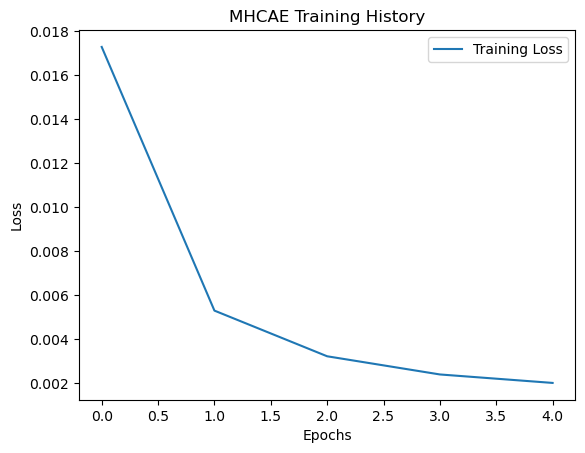

In [8]:
import matplotlib.pyplot as plt

# Assuming you have the training history stored in a variable named 'history'
# 'history' should contain training and validation loss values for each epoch

# Plotting training and validation loss
plt.plot(history1.history['loss'], label='Training Loss')
plt.title('MHCAE Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

print("Training Autoencoder 2...")
autoencoder2.set_weights(autoencoder1.get_weights())  
history2 = train_autoencoder(autoencoder2, mid_res_data)
print("Autoencoder 2 training complete.")


In [ ]:

print("Training Autoencoder 3...")
autoencoder3.set_weights(autoencoder2.get_weights())  
history3 = train_autoencoder(autoencoder3, mid_res_data)
print("Autoencoder 3 training complete.")


In [10]:
import matplotlib.pyplot as plt

# Assuming you have the training history stored in a variable named 'history'
# 'history' should contain training and validation loss values for each epoch

# Plotting training and validation loss
plt.plot(history3.history['loss'], label='Training Loss')
plt.title('MHCAE Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [7]:
save_model(autoencoder3, 'final_autoencoder.h5')

### Testing the trained Model

In [6]:

Final_AutoEncoder = load_model('final_autoencoder.h5')

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def preprocess_single_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) / 255.0
    return np.expand_dims(img, axis=(0, -1))

def save_image(image, path):
    plt.imshow(image.squeeze(), cmap='gray')
    plt.axis('off')
    plt.savefig(path, bbox_inches='tight', pad_inches=0)
    plt.close()

def visualize_images(original, reconstructed):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original.squeeze(), cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed.squeeze(), cmap='gray')
    plt.title('Reconstructed Image')
    plt.show()

test_image_path = "/home/aflah/Desktop/Final-Year-Project/Project-Phase-2/benign_400X_images/SOB_B_A-14-22549AB-400-001.png"

# Preprocess the image
test_image_mrcae = preprocess_single_image(test_image_path)

# Predict using the flexible autoencoder
reconstructed_image_mrcae = Final_AutoEncoder.predict(test_image_mrcae)

# Save and visualize the original and reconstructed images
save_image(test_image_mrcae, 'original_image_mrcae.png')
save_image(reconstructed_image_mrcae, 'reconstructed_image_mrcae.png')
visualize_images(test_image_mrcae, reconstructed_image_mrcae)

# Calculate and display the Mean Squared Error (MSE)
mse = np.mean(np.square(test_image_mrcae - reconstructed_image_mrcae))
print(f'Mean Squared Error (MSE): {mse}')


1/1 [==============================] - 1s 537ms/step


Mean Squared Error (MSE): 6.882280689115079e-05


# Classification of Breast Cancer

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_dataset(input_folder, output_folder, test_size=0.2, random_state=42):
    # Create output folders
    train_folder = os.path.join(output_folder, 'train')
    test_folder = os.path.join(output_folder, 'test')
    
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)

  
    classes = [class_name for class_name in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, class_name))]

 
    for class_name in classes:
        class_input_folder = os.path.join(input_folder, class_name)
        class_train_folder = os.path.join(train_folder, class_name)
        class_test_folder = os.path.join(test_folder, class_name)

        os.makedirs(class_train_folder, exist_ok=True)
        os.makedirs(class_test_folder, exist_ok=True)

        
        files = [file_name for file_name in os.listdir(class_input_folder) if os.path.isfile(os.path.join(class_input_folder, file_name))]

      
        train_files, test_files = train_test_split(files, test_size=test_size, random_state=random_state)

       
        for file_name in train_files:
            shutil.copy(os.path.join(class_input_folder, file_name), os.path.join(class_train_folder, file_name))

        for file_name in test_files:
            shutil.copy(os.path.join(class_input_folder, file_name), os.path.join(class_test_folder, file_name))

if __name__ == "__main__":

    input_folder = "Augmented_Images"
    output_folder = "TrainTestSplit"

 
    test_size = 0.2
    random_state = 42

   
    split_dataset(input_folder, output_folder, test_size, random_state)


In [3]:

train_dir = "TrainTestSplit/train"
test_dir = "TrainTestSplit/test"


In [40]:
import os
import cv2
import glob

SIZE = 224

train_images = []
train_labels = []

allowed_formats = ['.jpg', '.jpeg', '.png']


def load_images_from_directory(directory_path):
    images = []
    labels = []
    for label in os.listdir(directory_path):
        label_path = os.path.join(directory_path, label)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                if os.path.isfile(img_path) and any(img_path.lower().endswith(fmt) for fmt in allowed_formats):
                    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                    if img is not None:
                        img = cv2.resize(img, (SIZE, SIZE))
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        images.append(img)
                        labels.append(label)
                    else:
                        print(f"Error loading image: {img_path}")
                else:
                    print(f"Skipped non-image file: {img_path}")
    return images, labels


train_dir = "TrainTestSplit/train"



train_images, train_labels = load_images_from_directory(train_dir)

print("Number of train images:", len(train_images))
print("Number of train labels:", len(train_labels))



Number of train images: 9382
Number of train labels: 9382


In [5]:
train_img_array = train_images
train_img_labels = train_labels
set(train_img_labels)

{'adenosis',
 'ductal_carcinoma',
 'fibroadenoma',
 'lobular_carcinoma',
 'mucinous_carcinoma',
 'papillary_carcinoma',
 'phyllodes_tumor',
 'tubular_adenoma'}

In [42]:
import os
import cv2
import glob

SIZE = 224

test_images = []
test_labels = []

allowed_formats = ['.jpg', '.jpeg', '.png']


def load_images_from_directory(directory_path):
    images = []
    labels = []
    for label in os.listdir(directory_path):
        label_path = os.path.join(directory_path, label)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                if os.path.isfile(img_path) and any(img_path.lower().endswith(fmt) for fmt in allowed_formats):
                    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                    if img is not None:
                        img = cv2.resize(img, (SIZE, SIZE))
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        images.append(img)
                        labels.append(label)
                    else:
                        print(f"Error loading image: {img_path}")
                else:
                    print(f"Skipped non-image file: {img_path}")
    return images, labels



test_dir = "TrainTestSplit/test"


test_images, test_labels = load_images_from_directory(test_dir)

print("Number of test images:", len(test_images))
print("Number of test labels:", len(test_labels))


Number of test images: 2348
Number of test labels: 2348


In [7]:
test_img_array = test_images
test_img_labels = test_labels
set(test_img_labels)

{'adenosis',
 'ductal_carcinoma',
 'fibroadenoma',
 'lobular_carcinoma',
 'mucinous_carcinoma',
 'papillary_carcinoma',
 'phyllodes_tumor',
 'tubular_adenoma'}

In [8]:
import numpy as np

train_images = np.array(train_img_array)
train_labels = np.array(train_img_labels)

test_images = np.array(test_img_array)
test_labels = np.array(test_img_labels)

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)


In [10]:

import os
import seaborn as sns
import numpy as np


2024-04-29 15:15:26.124865: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-29 15:15:26.141909: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 15:15:26.223880: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 15:15:26.224364: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 15:15:26.724053: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [14]:
import os
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder


model = load_model('final_autoencoder.h5')

In [13]:
x_train, y_train, x_test, y_test  = train_images, train_labels_encoded, test_images, test_labels_encoded

In [14]:
x_train, x_test  = x_train / 255.0, x_test / 255.0 

In [ ]:
feature_extractor=model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_for_training = features

np.savez('train_features.npy', features=features)

In [16]:
loaded_train_data = np.load('train_features.npy')
loaded_train_features = loaded_train_data['features']

In [ ]:
X_test_feature = model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

np.savez('test_features.npy', features=X_test_features)


In [18]:
loaded_test_data = np.load('test_features.npy')
loaded_test_features = loaded_test_data['features']

## Adaboost Algorithm

In [20]:
adaboost_classifier = AdaBoostClassifier(n_estimators=65, learning_rate = 0.1,algorithm = 'SAMME.R')

In [21]:
model = adaboost_classifier.fit(loaded_train_features, y_train)

In [ ]:
joblib.dump(model, 'adaboost_model.joblib')

In [5]:
import joblib
adaboost = joblib.load('adaboost_model.joblib')

In [24]:
y_pred = model.predict(loaded_test_features)
prediction = le.inverse_transform(y_pred)

In [59]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))


Accuracy =  0.7022998296422487


In [11]:
def extract_features(img_path):
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

# Load the test image
test_img_path = '/home/aflah/Desktop/Final-Year-Project-Report/Notebook/classes/adenosis/SOB_B_A-14-22549CD-400-014.png'  # Provide the path to your test image
test_features = extract_features(test_img_path)

# Make predictions using the trained AdaBoost model
predicted_class = adaboost.predict(test_features.reshape(1, -1))[0]

# Reverse the mapping to get the class name
class_dict = {0: 'adenosis', 1: 'ductal_carcinoma', 2: 'fibroadenoma', 3: 'lobular_carcinoma', 4: 'mucinous_carcinoma', 5: 'papillary_carcinoma', 6: 'phyllodes_tumor', 7: 'tubular_adenoma'}
predicted_class_name = class_dict[predicted_class]

print("Predicted Class:", predicted_class_name)


1/1 [==============================] - 0s 145ms/step
Predicted Class: adenosis


In [58]:
from matplotlib import pyplot as plt
cm = metrics.confusion_matrix(test_labels, prediction)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [61]:
target_names = [ 'adenosis',
 'ductal_carcinoma',
 'fibroadenoma',
 'lobular_carcinoma',
 'mucinous_carcinoma',
 'papillary_carcinoma',
 'phyllodes_tumor',
 'tubular_adenoma']
print(metrics.classification_report(test_labels, prediction, target_names=target_names))

                     precision    recall  f1-score   support

           adenosis       0.70      0.61      0.65       294
   ductal_carcinoma       0.51      0.79      0.62       247
       fibroadenoma       0.96      0.84      0.90       326
  lobular_carcinoma       0.59      0.57      0.58       279
 mucinous_carcinoma       0.70      0.89      0.78       443
papillary_carcinoma       0.57      0.55      0.56       278
    phyllodes_tumor       0.90      0.76      0.83       306
    tubular_adenoma       0.97      0.35      0.51       175

           accuracy                           0.70      2348
          macro avg       0.74      0.67      0.68      2348
       weighted avg       0.73      0.70      0.70      2348



## Random Forest Classifier

In [26]:
params = {'bootstrap': True,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 155,
 'random_state':42
         }
rf_classifier = RandomForestClassifier(**params)

In [27]:
rf_classifier.fit(loaded_train_features, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=155, random_state=42)

In [28]:
joblib.dump(rf_classifier, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [29]:
randomforest = joblib.load('random_forest_model.joblib')

In [30]:
y_pred = rf_classifier.predict(loaded_test_features)
prediction = le.inverse_transform(y_pred)

In [66]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

Accuracy =  0.9033219761499148


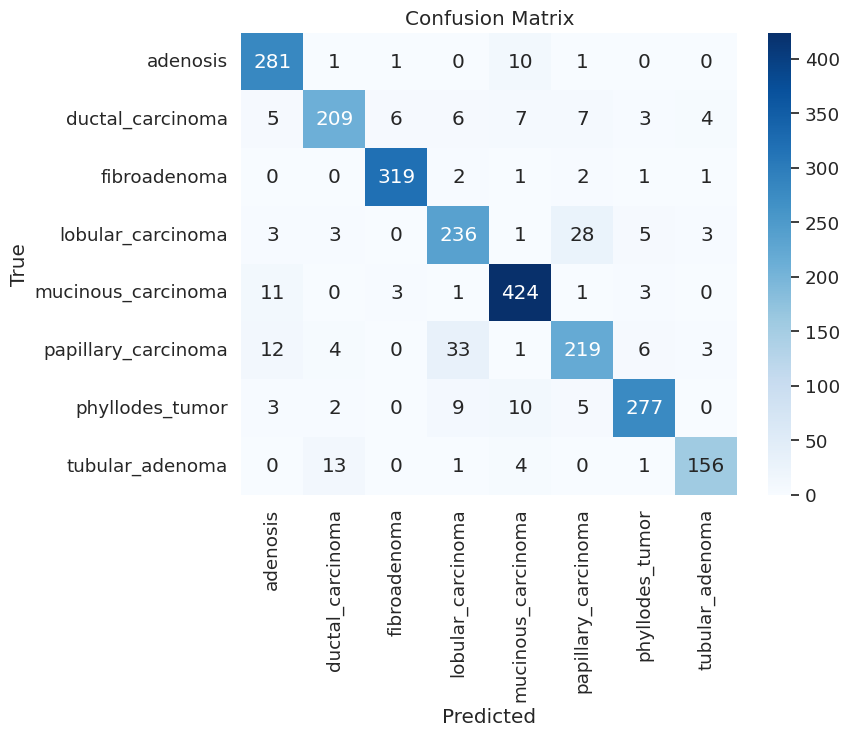

In [67]:
cm = metrics.confusion_matrix(test_labels, prediction)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [68]:
target_names = [ 'adenosis',
 'ductal_carcinoma',
 'fibroadenoma',
 'lobular_carcinoma',
 'mucinous_carcinoma',
 'papillary_carcinoma',
 'phyllodes_tumor',
 'tubular_adenoma']
print(metrics.classification_report(test_labels, prediction, target_names=target_names))

                     precision    recall  f1-score   support

           adenosis       0.89      0.96      0.92       294
   ductal_carcinoma       0.90      0.85      0.87       247
       fibroadenoma       0.97      0.98      0.97       326
  lobular_carcinoma       0.82      0.85      0.83       279
 mucinous_carcinoma       0.93      0.96      0.94       443
papillary_carcinoma       0.83      0.79      0.81       278
    phyllodes_tumor       0.94      0.91      0.92       306
    tubular_adenoma       0.93      0.89      0.91       175

           accuracy                           0.90      2348
          macro avg       0.90      0.90      0.90      2348
       weighted avg       0.90      0.90      0.90      2348



## XGBoost Algorithm

In [9]:
import xgboost as xgb

In [33]:
params = {
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 0.01,
            'n_estimators':60,
            'device':'cuda',
            'subsample' : 0.8,
            'colsample_bytree':0.8
        }
xg = xgb.XGBClassifier(**params)

In [34]:
xg.fit(loaded_train_features, y_train) 

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=60, n_jobs=None,
              num_parallel_tree=None, ...)

In [16]:
import joblib

In [21]:
xgboost = joblib.load('xgboost_model.joblib')


In [37]:
y_pred = xg.predict(loaded_test_features)
prediction = le.inverse_transform(y_pred)

/home/jupyter-akshay/.local/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [15:21:25] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [35]:
from sklearn import metrics

In [75]:
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))

Accuracy =  0.8398637137989778


In [23]:
# Load the test image
test_img_path = '/home/aflah/Desktop/Final-Year-Project-Report/Notebook/classes/adenosis/SOB_B_A-14-22549CD-400-014.png'  # Provide the path to your test image
test_features = extract_features(test_img_path)

# Make predictions using the trained AdaBoost model
predicted_class = xgboost.predict(test_features.reshape(1, -1))[0]

# Reverse the mapping to get the class name
class_dict = {0: 'adenosis', 1: 'ductal_carcinoma', 2: 'fibroadenoma', 3: 'lobular_carcinoma', 4: 'mucinous_carcinoma', 5: 'papillary_carcinoma', 6: 'phyllodes_tumor', 7: 'tubular_adenoma'}
predicted_class_name = class_dict[predicted_class]

print("Predicted Class:", predicted_class_name)


1/1 [==============================] - 0s 142ms/step
Predicted Class: adenosis


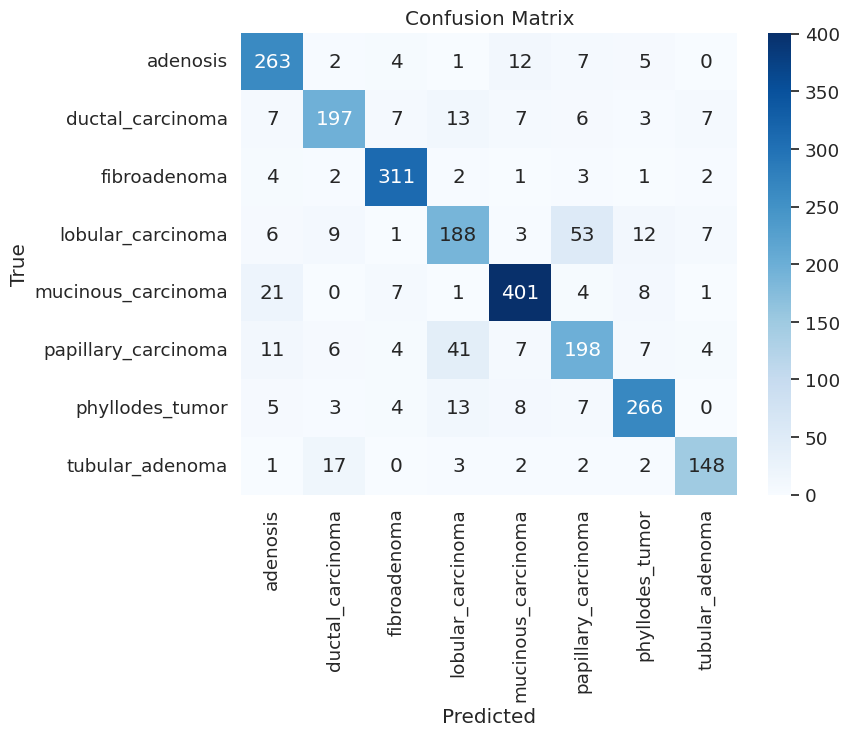

In [76]:
cm = metrics.confusion_matrix(test_labels, prediction)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [77]:
target_names = [ 'adenosis',
 'ductal_carcinoma',
 'fibroadenoma',
 'lobular_carcinoma',
 'mucinous_carcinoma',
 'papillary_carcinoma',
 'phyllodes_tumor',
 'tubular_adenoma']
print(metrics.classification_report(test_labels, prediction, target_names=target_names))

                     precision    recall  f1-score   support

           adenosis       0.83      0.89      0.86       294
   ductal_carcinoma       0.83      0.80      0.82       247
       fibroadenoma       0.92      0.95      0.94       326
  lobular_carcinoma       0.72      0.67      0.70       279
 mucinous_carcinoma       0.91      0.91      0.91       443
papillary_carcinoma       0.71      0.71      0.71       278
    phyllodes_tumor       0.88      0.87      0.87       306
    tubular_adenoma       0.88      0.85      0.86       175

           accuracy                           0.84      2348
          macro avg       0.83      0.83      0.83      2348
       weighted avg       0.84      0.84      0.84      2348



In [39]:
clf1 = adaboost_classifier
clf2 = rf_classifier
clf3 = xg

In [40]:
eclf1 = VotingClassifier(estimators=[
        ('adaboost', clf1), ('rf', clf2), ('xgb', clf3)], voting='soft')


In [41]:
eclf1 = eclf1.fit(loaded_train_features, y_train) 

In [43]:
import pickle
file_path = 'voting_classifier_model_vgg.pkl'

# Saving the trained VotingClassifier
with open(file_path, 'wb') as file:
    pickle.dump(eclf1, file)

print("VotingClassifier saved successfully.")


VotingClassifier saved successfully.


In [44]:
import pickle
file_path = 'voting_classifier_model_vgg.pkl'

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

print("VotingClassifier loaded successfully.")

VotingClassifier loaded successfully.


In [42]:
y_pred = eclf1.predict(loaded_test_features)
prediction = le.inverse_transform(y_pred)

In [47]:
accuracy = accuracy_score(y_test, y_pred)

print(f'VotingClassifier Accuracy: {accuracy * 100:}%')


VotingClassifier Accuracy: 90.12112


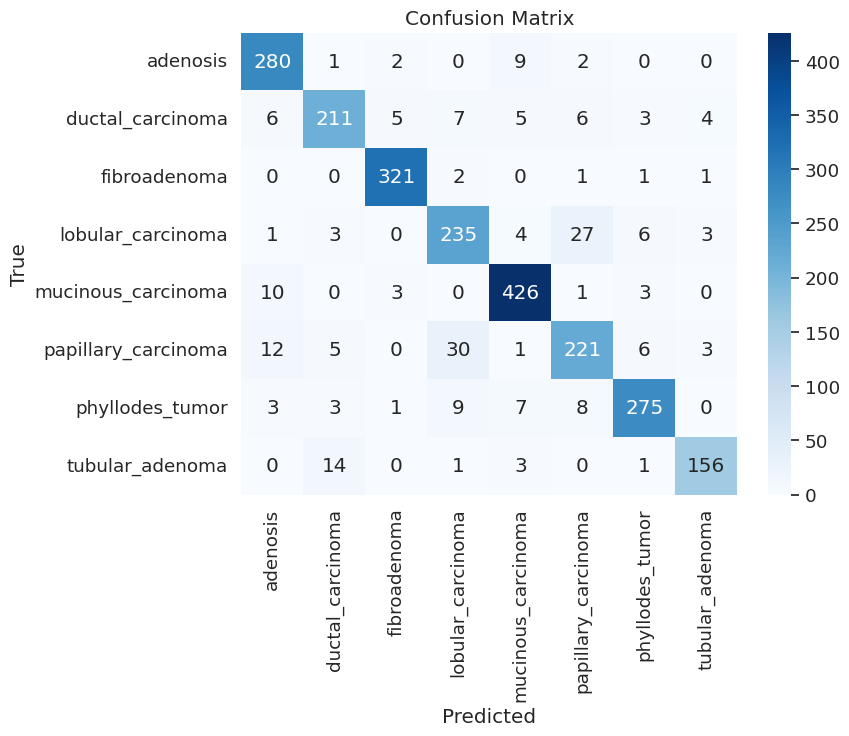

In [84]:
cm = metrics.confusion_matrix(test_labels, prediction)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [85]:
target_names = [ 'adenosis',
 'ductal_carcinoma',
 'fibroadenoma',
 'lobular_carcinoma',
 'mucinous_carcinoma',
 'papillary_carcinoma',
 'phyllodes_tumor',
 'tubular_adenoma']
print(metrics.classification_report(test_labels, prediction, target_names=target_names))

                     precision    recall  f1-score   support

           adenosis       0.90      0.95      0.92       294
   ductal_carcinoma       0.89      0.85      0.87       247
       fibroadenoma       0.97      0.98      0.98       326
  lobular_carcinoma       0.83      0.84      0.83       279
 mucinous_carcinoma       0.94      0.96      0.95       443
papillary_carcinoma       0.83      0.79      0.81       278
    phyllodes_tumor       0.93      0.90      0.92       306
    tubular_adenoma       0.93      0.89      0.91       175

           accuracy                           0.91      2348
          macro avg       0.90      0.90      0.90      2348
       weighted avg       0.90      0.91      0.90      2348



1/1 [==============================] - 0s 339ms/step


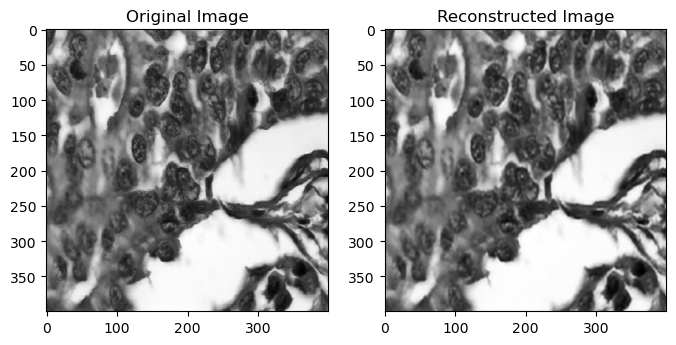


Image 1 - Mean Squared Error (MSE): 0.0003460475418251008
1/1 [==============================] - 0s 293ms/step


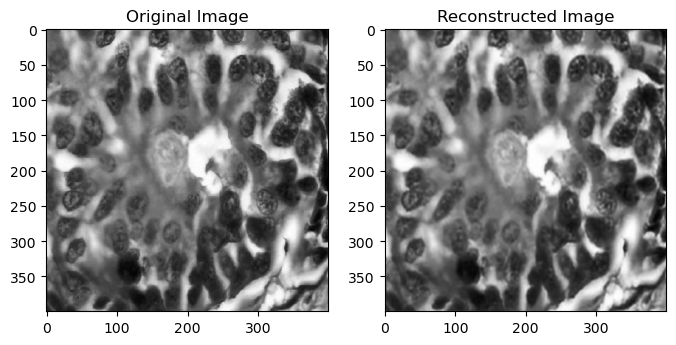


Image 2 - Mean Squared Error (MSE): 0.00022329261992126703
1/1 [==============================] - 0s 287ms/step



Image 3 - Mean Squared Error (MSE): 0.0007271022186614573
1/1 [==============================] - 0s 297ms/step



Image 4 - Mean Squared Error (MSE): 0.0006181520875543356
1/1 [==============================] - 0s 285ms/step



Image 5 - Mean Squared Error (MSE): 0.0004989145672880113
1/1 [==============================] - 0s 282ms/step



Image 6 - Mean Squared Error (MSE): 0.000560518994461745
1/1 [==============================] - 0s 279ms/step


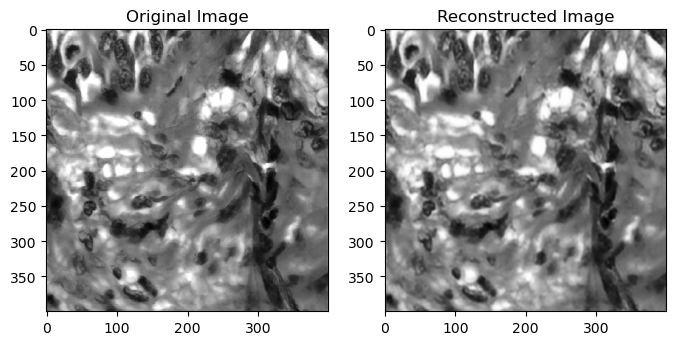


Image 7 - Mean Squared Error (MSE): 0.0002785401011351496
1/1 [==============================] - 0s 282ms/step



Image 8 - Mean Squared Error (MSE): 0.0005852565518580377
1/1 [==============================] - 0s 275ms/step


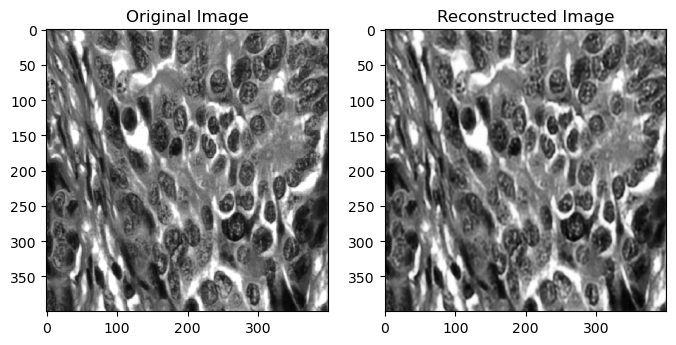


Image 9 - Mean Squared Error (MSE): 0.000635928416159004
1/1 [==============================] - 0s 283ms/step


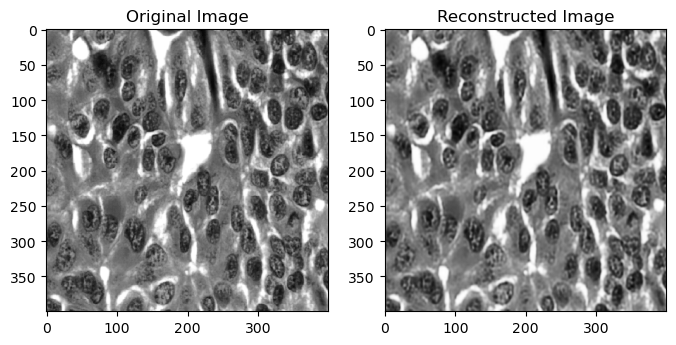


Image 10 - Mean Squared Error (MSE): 0.0005955178057774901
1/1 [==============================] - 0s 269ms/step



Image 11 - Mean Squared Error (MSE): 0.0002321816427865997
1/1 [==============================] - 0s 274ms/step


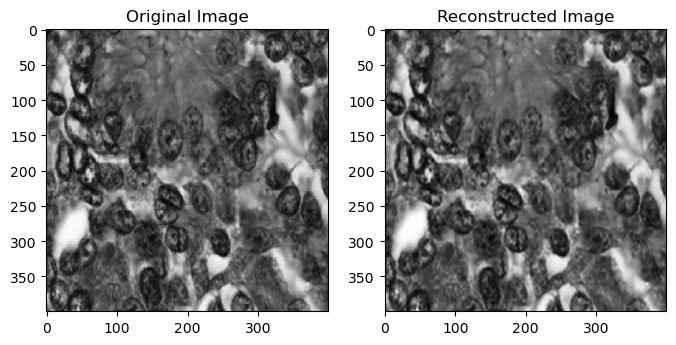


Image 12 - Mean Squared Error (MSE): 0.00020788441179320216
1/1 [==============================] - 0s 278ms/step


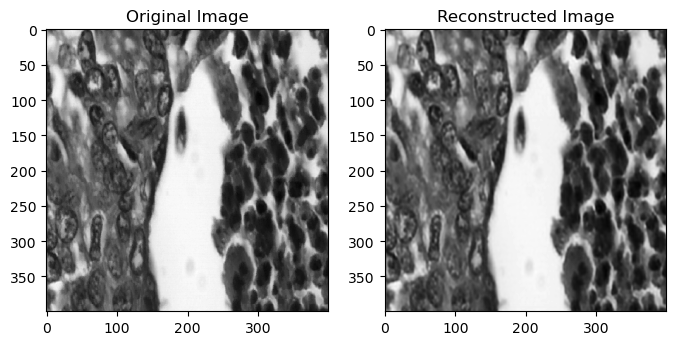


Image 13 - Mean Squared Error (MSE): 0.00017894225311465561
1/1 [==============================] - 0s 286ms/step


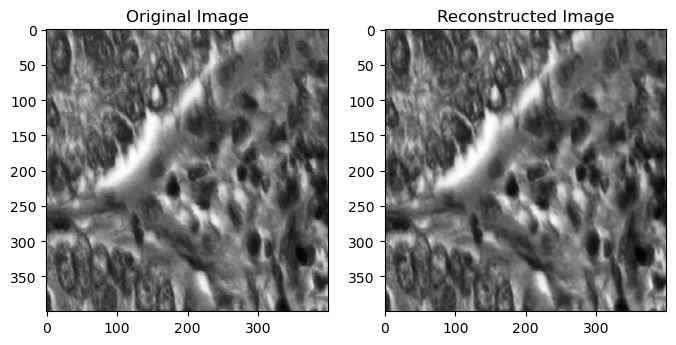


Image 14 - Mean Squared Error (MSE): 0.00018370278121437877
1/1 [==============================] - 0s 294ms/step


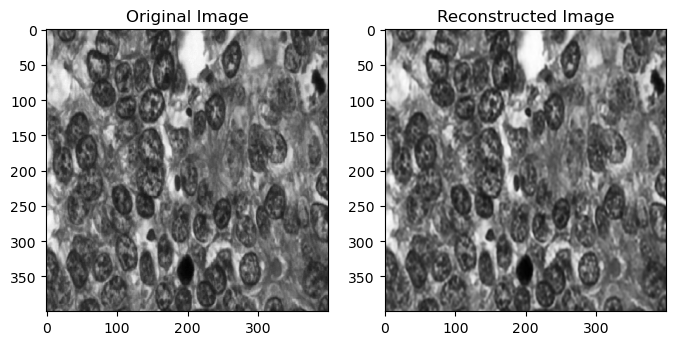


Image 15 - Mean Squared Error (MSE): 0.00031927446252666414
1/1 [==============================] - 0s 283ms/step


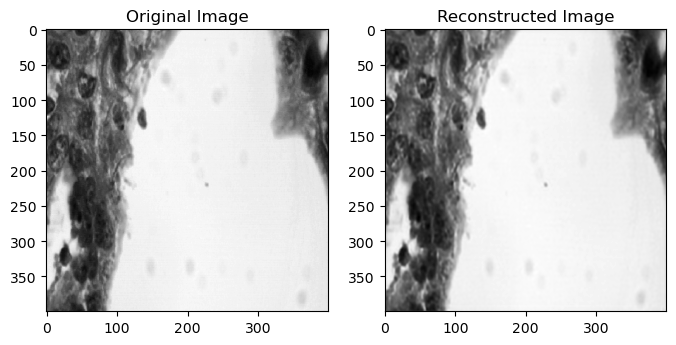


Image 16 - Mean Squared Error (MSE): 7.712988735875115e-05
1/1 [==============================] - 0s 276ms/step



Image 17 - Mean Squared Error (MSE): 0.0002519257250241935
1/1 [==============================] - 0s 271ms/step


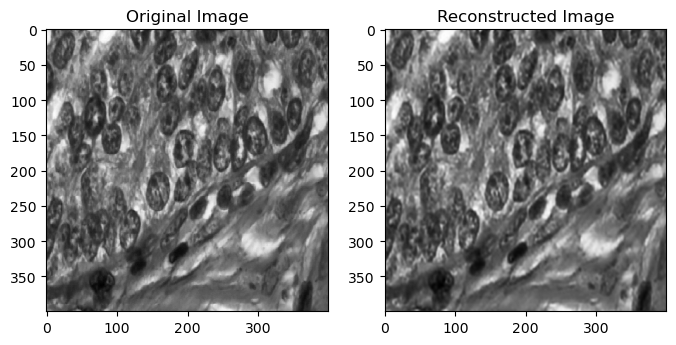


Image 18 - Mean Squared Error (MSE): 0.00017287499213125557
1/1 [==============================] - 0s 275ms/step


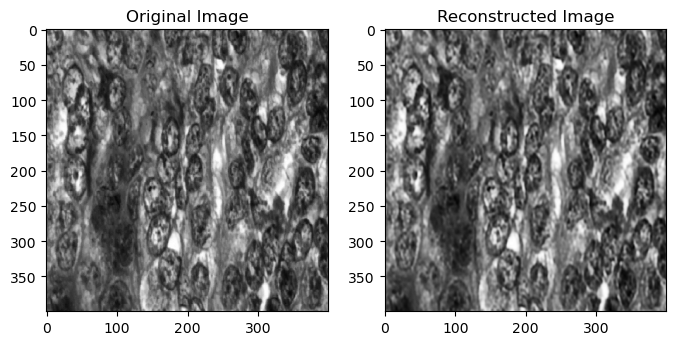


Image 19 - Mean Squared Error (MSE): 0.00034192923340015113
1/1 [==============================] - 0s 284ms/step



Image 20 - Mean Squared Error (MSE): 0.0002273318823426962

List of MSE Values:
[0.00034604754, 0.00022329262, 0.0007271022, 0.0006181521, 0.00049891457, 0.000560519, 0.0002785401, 0.00058525655, 0.0006359284, 0.0005955178, 0.00023218164, 0.00020788441, 0.00017894225, 0.00018370278, 0.00031927446, 7.712989e-05, 0.00025192573, 0.00017287499, 0.00034192923, 0.00022733188]


In [4]:
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

# Load the saved autoencoder model
final_autoencoder = load_model("final_autoencoder.h5")

# Function to preprocess a single image
def preprocess_single_image(image_path, target_resolution):
    img = load_img(image_path, target_size=(target_resolution, target_resolution), color_mode='grayscale')
    img_array = img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

def visualize_images(original, reconstructed):
    plt.figure(figsize=(8, 4))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(original.squeeze(), cmap='gray')
    plt.title('Original Image')
    
    # Reconstructed image
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed.squeeze(), cmap='gray')
    plt.title('Reconstructed Image')
    
    plt.show()

# Load and preprocess multiple test images
test_image_paths = [
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img1.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img2.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img3.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img4.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img5.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img6.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img7.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img8.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img9.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img10.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img11.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img12.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img13.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img14.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img15.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img16.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img17.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img18.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img19.png",
    "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/Test/img20.png"
]

target_resolution = 400

test_images = [preprocess_single_image(image_path, target_resolution) for image_path in test_image_paths]

# Compile the model
final_autoencoder.compile(optimizer='adam', loss='mse')

mse_values = []

for i, test_image in enumerate(test_images):
    reconstructed_image = final_autoencoder.predict(test_image)

    # Visualize the original and reconstructed images
    visualize_images(test_image, reconstructed_image)

    # Calculate and display the accuracy (mean squared error) for each image
    mse = np.mean(np.square(test_image - reconstructed_image))
    mse_values.append(mse)

    print(f'\nImage {i + 1} - Mean Squared Error (MSE): {mse}')

# Print the list of MSE values for each image
print('\nList of MSE Values:')
print(mse_values)


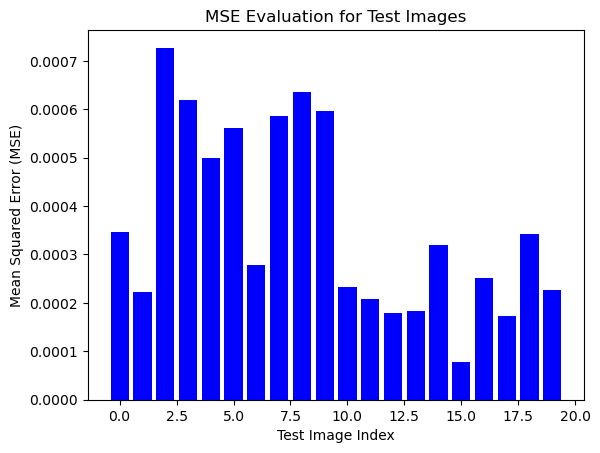

In [5]:
import matplotlib.pyplot as plt

# Assuming you have a list of MSE values for each test image
mse_values = mse_values  # Replace with actual MSE values

# Plotting the MSE values
plt.bar(range(len(mse_values)), mse_values, color='blue')
plt.xlabel('Test Image Index')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Evaluation for Test Images')
plt.show()


1/1 [==============================] - 0s 83ms/step


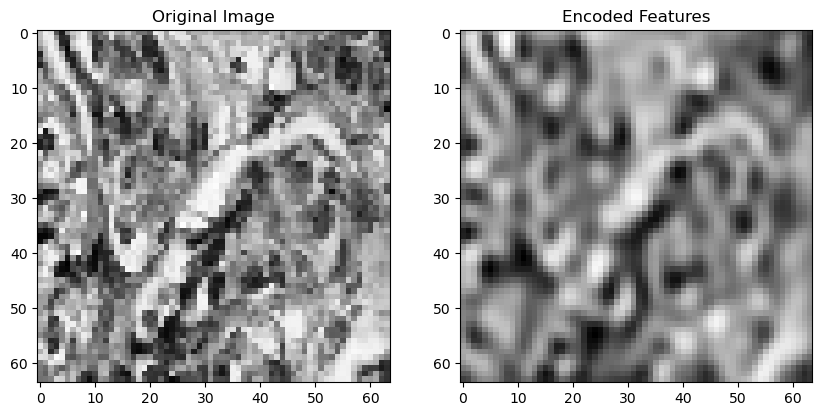

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the saved autoencoder model
final_autoencoder = load_model("final_autoencoder.h5")

image_path = "/home/aflah/Desktop/Final-Year-Project-Report/Notebook/classes/adenosis/SOB_B_A-14-22549AB-400-023.png"
test_image = load_img(image_path, target_size=(64, 64), color_mode='grayscale')
test_image_array = img_to_array(test_image) / 255.0  # Normalize pixel values

test_image_array = np.expand_dims(test_image_array, axis=0)

# Predict using the final_autoencoder
encoded_features = final_autoencoder.predict(test_image_array)

# Visualizing the original and encoded features
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(np.squeeze(test_image_array), cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(np.squeeze(encoded_features), cmap='gray')
axes[1].set_title('Encoded Features')

plt.show()
